In [103]:
import warnings
warnings.filterwarnings('ignore')

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
house_data = pd.read_csv('https://raw.githubusercontent.com/rusita-ai/pyData/master/house_price.csv')

house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6028 entries, 0 to 6027
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   house_id      6028 non-null   int64 
 1   neighborhood  6028 non-null   object
 2   area          6028 non-null   int64 
 3   bedrooms      6028 non-null   int64 
 4   bathrooms     6028 non-null   int64 
 5   style         6028 non-null   object
 6   price         6028 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 329.8+ KB


In [106]:
house_data.drop('house_id', axis=1, inplace=True)

house_data.head()

,neighborhood,area,bedrooms,bathrooms,style,price
0,B,1188,3,2,ranch,598291
1,B,3512,5,3,victorian,1744259
2,B,1134,3,2,ranch,571669
3,A,1940,4,2,ranch,493675
4,B,2208,6,4,victorian,1101539


In [107]:
DF1 = house_data[['price', 'area', 'bedrooms', 'bathrooms']]

## 상관관계 그래프

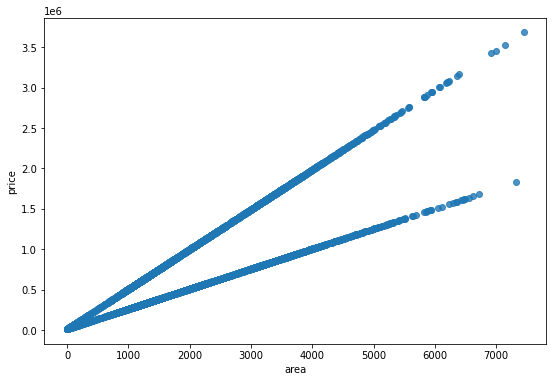

In [55]:
fig = plt.figure(figsize=(9, 6))
sns.regplot(x='area', y='price', data=DF1, fit_reg=False)
plt.show()

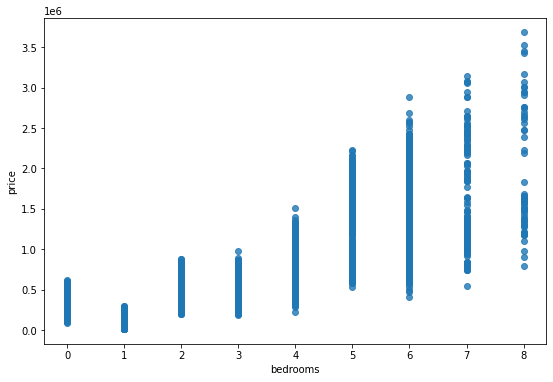

In [56]:
fig = plt.figure(figsize=(9, 6))
sns.regplot(x='bedrooms', y='price', data=DF1, fit_reg=False)
plt.show()

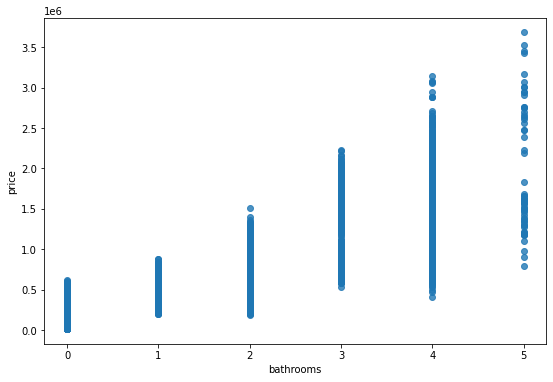

In [57]:
fig = plt.figure(figsize=(9, 6))
sns.regplot(x='bathrooms', y='price', data=DF1, fit_reg=False)
plt.show()

### pairplot

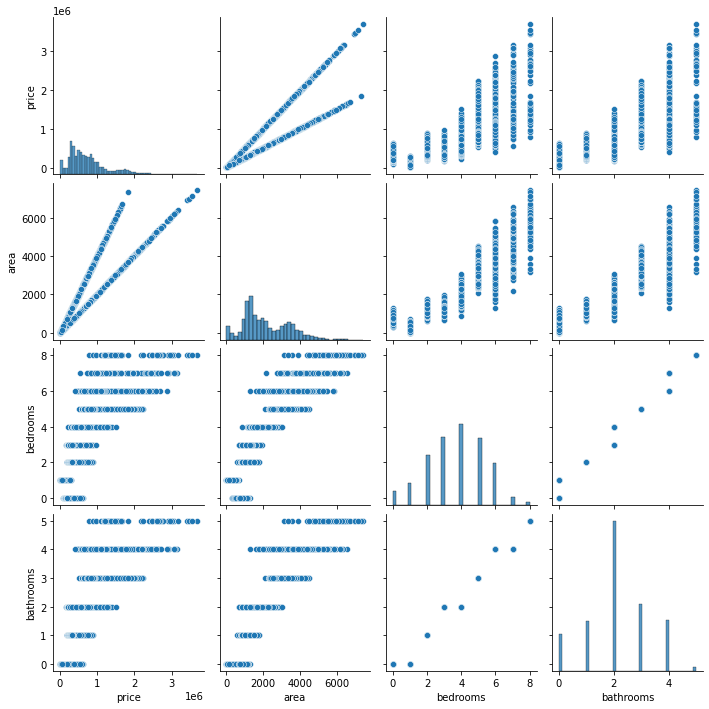

In [58]:
sns.pairplot(DF1)
plt.show()

## 상관계수

In [42]:
from scipy import stats

stats.pearsonr(DF1.price, DF1.area)[0]

0.8234537182735618

In [43]:
stats.pearsonr(DF1.price, DF1.bedrooms)[0]

0.7434351418523943

In [44]:
stats.pearsonr(DF1.price, DF1.bathrooms)[0]

0.7358511123795443

## Train & Test Split

In [108]:
from sklearn.model_selection import train_test_split

X = DF1[['area']]
y = DF1['price']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=2045)

print('Train Data: ', X_train.shape, y_train.shape)
print('Test Data: ', X_test.shape, y_test.shape)

Train Data:  (4219, 1) (4219,)
Test Data:  (1809, 1) (1809,)


## 단일회귀 - area

In [109]:
from sklearn.linear_model import LinearRegression

Model1 = LinearRegression()
Model1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [110]:
print('weight: ', Model1.coef_)
print('bias: ', Model1.intercept_)

weight:  [349.29377687]
bias:  7885.392941941624


In [111]:
Model1.score(X_test, y_test)

0.6784229855524156

In [112]:
from sklearn.metrics import mean_squared_error

y_hat1 = Model1.predict(X_test)

MSE1 = mean_squared_error(y_test, y_hat1)
print(MSE1)

88607832178.18301


### Visualization

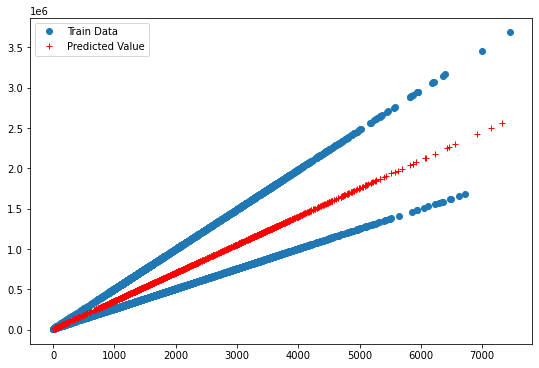

In [113]:
plt.figure(figsize=(9, 6))
plt.plot(X_train, y_train, 'o', label='Train Data')
plt.plot(X_test, y_hat1, 'r+', label='Predicted Value')
plt.legend(loc='best')
plt.show()

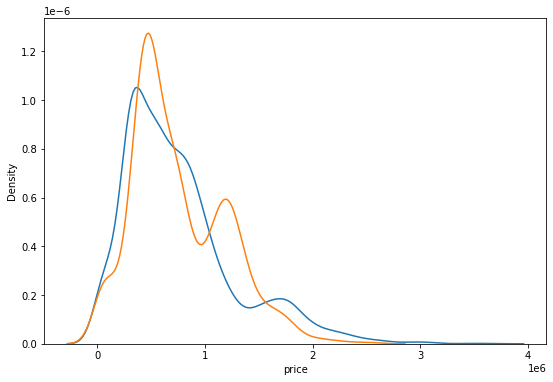

In [54]:
plt.figure(figsize=(9, 6))
ax1 = sns.distplot(y, hist=False, label='y')
ax2 = sns.distplot(y_hat1, hist=False, label='y_hat1', ax=ax1)
plt.show()

## 다중회귀 - area, bedrooms

In [114]:
from sklearn.model_selection import train_test_split

X = DF1[['area', 'bedrooms']]
y = DF1['price']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=2045)

print('Train Data: ', X_train.shape, y_train.shape)
print('Test Data: ', X_test.shape, y_test.shape)

Train Data:  (4219, 2) (4219,)
Test Data:  (1809, 2) (1809,)


In [115]:
from sklearn.linear_model import LinearRegression

Model2 = LinearRegression()
Model2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [116]:
print('weight: ', Model2.coef_)
print('bias: ', Model2.intercept_)

weight:  [ 347.26865687 1632.47075321]
bias:  6127.044707046822


In [117]:
Model2.score(X_test, y_test)

0.6784284465819819

In [118]:
from sklearn.metrics import mean_squared_error

y_hat2 = Model2.predict(X_test)

MSE2 = mean_squared_error(y_test, y_hat2)
print(MSE2)

88606327437.57784


### Visualization

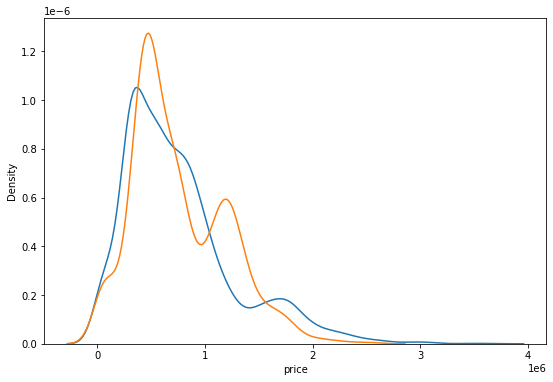

In [67]:
plt.figure(figsize=(9, 6))
ax1 = sns.distplot(y, hist=False, label='y')
ax2 = sns.distplot(y_hat1, hist=False, label='y_hat2', ax=ax1)
plt.show()

## 다항회귀 - area

In [120]:
from sklearn.model_selection import train_test_split

X = DF1[['area']]
y = DF1['price']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=2045)

print('Train Data: ', X_train.shape, y_train.shape)
print('Test Data: ', X_test.shape, y_test.shape)

Train Data:  (4219, 1) (4219,)
Test Data:  (1809, 1) (1809,)


In [121]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)

print(X_train.shape)
print(X_train_poly.shape)

(4219, 1)
(4219, 2)


In [122]:
from sklearn.linear_model import LinearRegression

Model3 = LinearRegression()
Model3.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [123]:
print('weight: ', Model3.coef_)
print('bias: ', Model3.intercept_)

weight:  [3.25839328e+02 4.65035767e-03]
bias:  29697.222041994333


In [124]:
X_test_poly = poly.fit_transform(X_test)

Model3.score(X_test_poly, y_test)

0.6778047487989153

In [125]:
from sklearn.metrics import mean_squared_error
y_hat3 = Model3.predict(X_test_poly)

MSE3 = mean_squared_error(y_test, y_hat3)
print(MSE3)

88778182097.60945


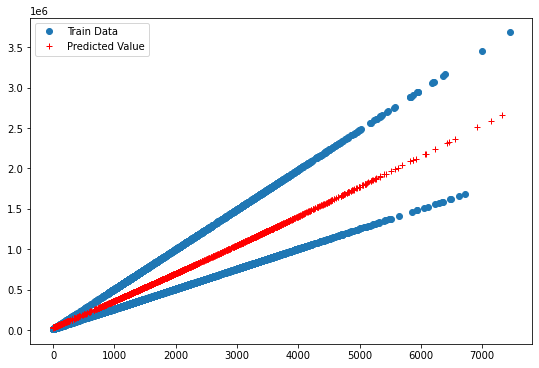

In [126]:
plt.figure(figsize=(9, 6))
plt.plot(X_train, y_train, 'o', label='Train Data')
plt.plot(X_test, y_hat3, 'r+', label='Predicted Value')
plt.legend(loc='best')
plt.show()

## Encoding

In [79]:
house_data.head()

,neighborhood,area,bedrooms,bathrooms,style,price
0,B,1188,3,2,ranch,598291
1,B,3512,5,3,victorian,1744259
2,B,1134,3,2,ranch,571669
3,A,1940,4,2,ranch,493675
4,B,2208,6,4,victorian,1101539


In [84]:
X = house_data[['style']]
X.head()

,style
0,ranch
1,victorian
2,ranch
3,ranch
4,victorian


In [85]:
X.value_counts()

style    
victorian    2997
ranch        1802
lodge        1229
dtype: int64

In [86]:
from sklearn.preprocessing import LabelEncoder

encoder1 = LabelEncoder()
LE = encoder1.fit_transform(X)

In [89]:
LE[:5]

array([1, 2, 1, 1, 2])